### K-means

In [ ]:
### librerias
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
## Cargar imagen y cambiarla a escalas de gris
imagen = cv2.imread('images/bote.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

dimensiones = imagen.shape
## clusters
k = 3

medias = np.random.choice(np.unique(imagen), k, replace=False)
print(medias)
## convertir la imagen a un vector
imagen = imagen.ravel().astype(float)

distancias = np.zeros((imagen.shape[0],k))
imagen = imagen.reshape(len(imagen),1)
imR = np.tile(imagen, k)

for h in range(100):
    distancias = np.sqrt((imR-medias)**2)

    minimos = np.argmin(distancias, axis=1)

    for j in range(k):
            medias[j] = np.mean(imagen[minimos==j])

imagen_seg = minimos.reshape(dimensiones)
# img_segmentada = imagen
# for j in range(k):
#         img_segmentada[minimos==j] = medias[j]

# img_segmentada = img_segmentada.reshape(dimensiones).astype(np.uint8)
# imagen = imagen.reshape(dimensiones).astype(np.uint8)

# fig3 = plt.figure(figsize= (12,6))
# a = fig3.add_subplot(1,2,1)
# plt.imshow(imagen, cmap='gray', vmin=0, vmax=255)
# plt.axis('off')

# b = fig3.add_subplot(1,2,2)
# plt.imshow(img_segmentada)
# plt.axis('off')

plt.imshow(imagen_seg, cmap='jet')
plt.axis('off')

### GMM

In [1]:
### librerias
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
NPDF = lambda x, mean, sd: (1/(np.sqrt (2*np.pi)*sd)) * np.exp(-0.5*((x-mean)/sd)**2)

## Cargar imagen y cambiarla a escalas de gris
imagen = cv2.imread('im25.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# hist = cv2.calcHist([imagen], [0], None, [256], [0,256])
# plt.plot(hist)
# plt.show()
dimensiones = imagen.shape
imagen = imagen.ravel().astype(float)

## clusters
k = 5
medias = np.random.choice(np.unique(imagen), k, replace=False)

# std = np.ones((k,))*np.std(imagen.ravel())
std = np.ones((k,))*5
phi = np.ones((k,))/k
N = imagen.shape[0]
gamma = np.zeros((N,k))
x=np.linspace(0,255,256)

for i in range(50):
    ## calcular gamma
    for j in range(k):
        gamma[:,j]= phi[j]*NPDF(imagen, medias[j], std[j])

    suma = np.sum(gamma, axis=1)
    im = np.repeat(suma,k).reshape(N,k)
    gamma = gamma/im

    # print(std)
    ## Recalcular los promedios, desviaciones y pesos
    for j in range(k):
        phi[j] = np.sum(gamma[:,j])
        medias[j] = np.dot(gamma[:,j],imagen)/phi[j]
        std[j] = np.sqrt(np.sum(gamma[:,j]*(imagen-medias[j])**2)/phi[j])
        phi[j] = phi[j]/N


    # print(std)
    # fig=plt.figure
    # plt.hist(imagen,256,[0,256],density=True)
    # for j in range(k):
    #     plt.plot(x, phi[j]*NPDF(x, medias[j], std[j]))
    plt.show()

(-0.5, 399.5, 299.5, -0.5)

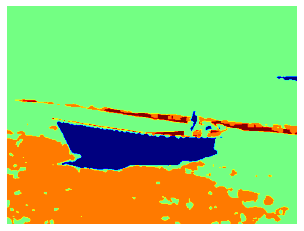

In [5]:
  
for j in range(k):
    temp=phi[j]*NPDF(imagen , medias[j] , std[j])
    temp=np.reshape(temp,dimensiones)
    temp = cv2.blur(temp,(5, 5))
    gamma[:,j]=temp.ravel().astype(float) 

assig=np.argmax(gamma,axis=1)
Iseg=imagen*1
for j in range(k):
    Iseg[assig==j]=medias[j]
    
Iseg=Iseg.reshape(dimensiones)
plt.imshow(Iseg, cmap='jet')
plt.axis('off')

In [5]:
#### Tarea ver si se puede evitar el for del phi, m, std

NPDF = lambda x, mean, sd: (1/(np.sqrt (2*np.pi)*sd)) * np.exp(-0.5*((x-mean)/sd)**2)

## Cargar imagen y cambiarla a escalas de gris
imagen = cv2.imread('images/bote.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# hist = cv2.calcHist([imagen], [0], None, [256], [0,256])
# plt.plot(hist)
# plt.show()
dimensiones = imagen.shape
imagen = imagen.ravel().astype(float)

## clusters
k = 5
medias = np.random.choice(np.unique(imagen), k, replace=False)
# std = np.ones((k,))*np.std(imagen.ravel())
std = np.ones((k,))*5
temp_2 = np.ones((k,))*5
N = imagen.shape[0]
gamma = np.zeros((N,k))
x=np.linspace(0,255,256)

print(phi.shape)
## graficar el histograma y las curvas de Gauss
fig=plt.figure
plt.hist(imagen,256,[0,256],density=True)
for j in range(k):
    plt.plot(x, phi[j]*NPDF(x, medias[j], std[j]))

## calcular gamma
for j in range(k):
    gamma[:,j] = phi[j]*NPDF(imagen, medias[j], std[j])
suma = np.sum(gamma, axis=1)
im = np.repeat(suma,k).reshape(N,k)
gamma = gamma/im

im_n = imagen.reshape(len(imagen),1)
distancias = np.tile(im_n, k)
# print(std)
## Recalcular los promedios, desviaciones y pesos
for j in range(k):
    phi[j] = np.sum(gamma[:,j])
    medias[j] = np.dot(gamma[:,j],imagen)/phi[j]
    std[j] = np.sqrt(np.sum(gamma[:,j]*(imagen-medias[j])**2)/phi[j])
    phi[j] = phi[j]/N

plt.show()
#gamma.sum(axis=0)
#np.divide((gamma*distancias).sum(axis=0),temp)
#np.sqrt(np.divide((gamma*(distancias-medias)**2).sum(axis=0),temp))
print(phi)
print(gamma.sum(axis=0)/N)


error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-q3d_8t8e\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
for k in range(k):
    gamma[:,k]=NPDF(imagen , medias[k] , std[k])
assig=np.argmax(gamma,axis=1)
Iseg=imagen*1
for k in range(k):
    Iseg[assig==k]=medias[k]
    
Iseg=Iseg.reshape(dimensiones)
plt.imshow(Iseg, cmap='jet')
plt.axis('off')